In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
test_data = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')


In [3]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train_data.shape)
print(test_data.shape)

(60000, 785)
(10000, 785)


In [27]:
train_data = np.array(train_data).T
test_data = np.array(test_data).T


In [46]:
x_train = train_data[1:]
x_train = x_train / 255
y_train = train_data[0]
x_test = test_data[1:]
x_test = x_test / 255
y_test = test_data[0]

In [30]:
x_train[:,0].shape

(784,)

In [48]:
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [43]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5 #creates an array with values between(-0.5 and 0.5)
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

In [56]:
def ReLU(Z):
    return np.maximum(Z,0)

In [57]:
def Softmax(Z):
    A = np.exp(Z)/sum(np.exp(Z))
    return A

In [58]:
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = Softmax(Z2)
    return Z1,A1,Z2,A2

In [51]:
def one_hot(Y):
    one_hot_y = np.zeros((Y.size,Y.max()+1))
    one_hot_y[np.arange(Y.size),Y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

In [36]:
def deriv_ReLU(Z):
    return Z > 0

In [52]:
def backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    m = Y.size
    one_hot_y = one_hot(Y)
    dZ2 = A2 - one_hot_y
    dW2 = 1 / m * dZ2.dot(A1.T) 
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1,db1,dW2,db2

In [38]:
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1,b1,W2,b2

In [62]:
def get_predictions(A2):
    return np.argmax(A2,0)

In [53]:
def get_accuracy(predictions,Y):
    return np.sum(predictions == Y) / Y.size

In [66]:
def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i % 50 == 0:
            print("Iteration: ",i)
            print("Accuracy: ", get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2

In [67]:
W1,b1,W2,b2 = gradient_descent(x_train,y_train,500,0.1)


Iteration:  0
Accuracy:  0.09556666666666666
Iteration:  50
Accuracy:  0.42038333333333333
Iteration:  100
Accuracy:  0.62415
Iteration:  150
Accuracy:  0.7128166666666667
Iteration:  200
Accuracy:  0.7609333333333334
Iteration:  250
Accuracy:  0.7892333333333333
Iteration:  300
Accuracy:  0.8079666666666667
Iteration:  350
Accuracy:  0.82085
Iteration:  400
Accuracy:  0.82995
Iteration:  450
Accuracy:  0.8375666666666667


In [68]:
def make_prediction(X,W1,b1,W2,b2):
    _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

In [77]:
import matplotlib.pyplot as plt
def test_predictions(index,W1,b1,W2,b2):
    current_image = x_train[:,index,None]
    prediction = make_prediction(current_image,W1,b1,W2,b2)
    label = y_train[index]
    print("prediction : ", prediction)
    print("label : ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image,interpolation = "nearest")
    plt.show()

prediction :  [1]
label :  1


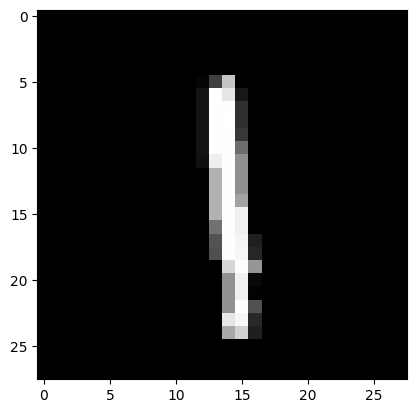

In [82]:
test_predictions(8,W1,b1,W2,b2)

In [84]:
predictions = make_prediction(x_test,W1,b1,W2,b2)
get_accuracy(predictions,y_test)

0.8468

In [85]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score

In [87]:
cm = confusion_matrix(y_test,predictions)
cm

array([[ 931,    0,    3,    9,    1,   16,    8,    3,    6,    3],
       [   0, 1089,    6,    6,    1,    4,    3,    1,   25,    0],
       [  13,   20,  845,   35,   15,    2,   29,   14,   44,   15],
       [  12,    0,   26,  848,    2,   54,   10,   20,   36,    2],
       [   0,    0,    7,    0,  841,    0,   36,    1,    7,   90],
       [  26,   13,    5,   65,   17,  642,   22,    9,   84,    9],
       [  19,    3,   23,    4,   29,   17,  854,    2,    7,    0],
       [   3,   19,   36,    3,   10,    2,    0,  892,    9,   54],
       [   6,   14,   20,   63,   18,   55,    8,    6,  738,   46],
       [  10,    1,    7,   12,   93,   15,    3,   58,   22,  788]])

In [88]:
precision = precision_score(y_test, predictions, average='weighted')
precision

0.8462853148935788

In [89]:
f1 = f1_score(y_test, predictions, average='weighted')
f1

0.8461810200509624

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    """
    Function to plot a confusion matrix using seaborn heatmap.
    :param y_true: Ground truth labels.
    :param y_pred: Predicted labels.
    :param class_names: List of class names.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix (optional)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix (Normalized)")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.savefig("/kaggle/working/example_plot.png")  
    plt.show()

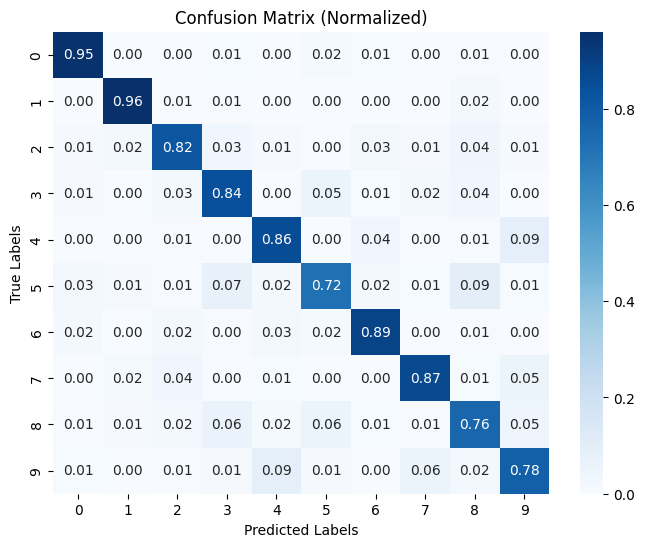

In [94]:
plot_confusion_matrix(y_test,predictions,[0,1,2,3,4,5,6,7,8,9])